In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from math import sqrt, cos, sin, acos, asin, atan, pi
from matplotlib import collections as mc
import numpy as np

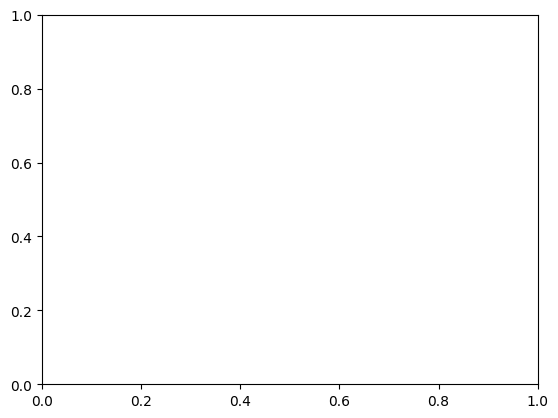

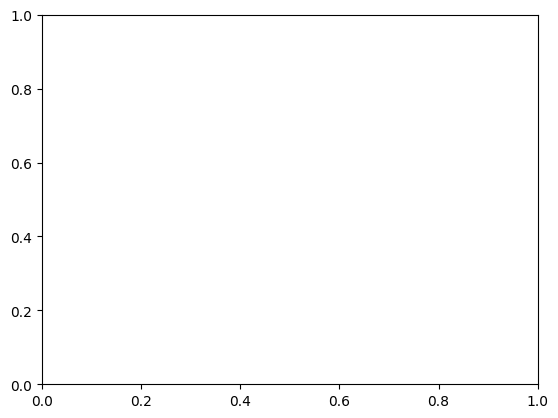

In [10]:
class Monad:
    def __init__(self, radius = 0.075, density = 1.15e3) -> None:
        self.radius = radius
        self.density = density
        self.n_faces = 18
        self.n_links = 24
        self.face_length = (2 * self.radius) / (3 * sqrt(2) - 1)
        self.link_length = self.radius * ((2 - sqrt(2)) / (3 * sqrt(2) - 1))
        self.thickness = self.radius / 50
        self.link_width = self.face_length / 2
        self.face_volume = self.face_length ** 2 * self.thickness
        self.link_volume = self.link_length * self.link_width * self.thickness
        self.mass = (self.face_volume * self.n_faces + self.link_volume * self.n_links) * self.density * 2

        self.q1 = pi/4
        self.q2 = 0

        origin_joint = np.array([0,0])
        latch_link_joint = np.array([self.face_length*cos(self.q1), self.face_length*sin(self.q1)])
        link_actuator_joint = np.add(latch_link_joint,np.array([self.link_length*cos(self.q2), self.link_length*sin(self.q2)]))

        self.joints = np.array([origin_joint,latch_link_joint, link_actuator_joint])


    def __str__(self):
        return f"Radius = {self.radius*1000} mm, Density = {self.density} Kg/m3\nFace length = {self.face_length*1000} mm, Link length = {self.link_length*1000}mm\nMonad mass = {self.mass} KG"

    def drawJoints(self, ax = plt.figure().add_subplot()):
        ax.scatter(self.joints[:,0],self.joints[:,1])
        return ax

    def drawSegments(self, ax = plt.figure().add_subplot()):
        plt.plot(self.joints[0:1,0],self.joints[0:1,1])
        plt.plot(self.joints[1:2,0],self.joints[1:2,1])
        plt.plot(self.joints[2:3,0],self.joints[2:3,1])

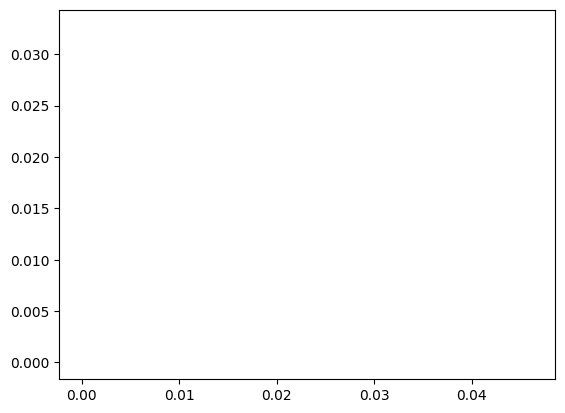

In [11]:
monad = Monad()
monad.drawSegments()
